In [1]:
# libraries imported
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [6]:
# Read resources
# Read each sheets
lot = pd.read_excel('lot.xlsx')
# Sheet 1 chonnoc
# Sheet 2 chondic
# Sheet 3 other

In [3]:
# Show each sheet
display(lot)

,date,num
0,2024-08-12,1234
1,2024-08-13,1111
2,2024-08-14,3455
3,2024-08-15,9807
4,2024-08-16,1264
5,2024-08-17,0
6,2024-08-18,23
7,2024-08-19,1032
8,2024-08-20,4301


ETL

Extract: consume dates and lot numbers

Transform: recognizing patterns according its numbers

Load: carry resorces prepared to Power BI

In [4]:
# It creates lists, They contain all the numbers of the lottery that probably will take
# lottery numbers with one, two, three and four numbers and zeros to left formatted.
num_lot_u = list(map(lambda x: f'{x:01}', range(0, 10)))
num_lot_d = list(map(lambda x: f'{x:02}', range(0, 100)))
num_lot_t = list(map(lambda x: f'{x:03}', range(0, 1000)))
num_lot_c = list(map(lambda x: f'{x:04}', range(0, 10000)))

print("Numbers with one number:\n" , num_lot_u , "\n there are:" , len(num_lot_u))
print("Numbers with two numbers:\n" , num_lot_d , "\n there are:" , len(num_lot_d))
print("Numbers with three numbers:\n" , num_lot_t , "\n there are:" , len(num_lot_t))
print(f"Numbers with two numbers:\n{num_lot_c}\nThere are: {len(num_lot_c):,}")

Numbers with one number:
 ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] 
 there are: 10
Numbers with two numbers:
 ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'] 
 there are: 100
Numbers with three numbers:
 ['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '

In [5]:
# Formatear los números con ceros a la izquierda
lot['num'] = lot['num'].apply(lambda x: f'{int(x):04}')
# Renombrar la columna 'num' a 'c_cifras' = cuatro cifras
lot.rename(columns={'num': 'c_cifras'}, inplace=True)
#show all the dataframe
display(lot)
#show info of the cells
lot.info()

,date,c_cifras
0,2024-08-12,1234
1,2024-08-13,1111
2,2024-08-14,3455
3,2024-08-15,9807
4,2024-08-16,1264
5,2024-08-17,0000
6,2024-08-18,0023
7,2024-08-19,1032
8,2024-08-20,4301


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      9 non-null      datetime64[ns]
 1   c_cifras  9 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 276.0+ bytes


In [ ]:
#add new columns with the numbers c_cifra as reference to split them and apply lambda with str(convert in string) an it is using slice
lot['t_cifras'] = lot['c_cifras'].apply(lambda x: int(str(x)[-3:]))
lot['d_cifras'] = lot['c_cifras'].apply(lambda x: int(str(x)[-2:]))
lot['u_cifra'] = lot['c_cifras'].apply(lambda x: int(str(x)[-1:]))
inplace=True #rewrite the original dataframe
display(lot)

,date,c_cifras,t_cifras,d_cifras,u_cifra
0,2024-01-01,2524,524,24,4
1,2024-01-02,0324,324,24,4
2,2024-01-03,9743,743,43,3
3,2024-01-04,1254,254,54,4
4,2024-01-05,1111,111,11,1
5,2024-01-06,1222,222,22,2
6,2024-01-07,2233,233,33,3
7,2024-01-08,0526,526,26,6
8,2024-01-09,0851,851,51,1
9,2024-01-10,0152,152,52,2


In [ ]:
'''
drop: erase column, axis=1 (rows) is files and inplace=true: rewrite original dataframe
columnas_eliminar = ['c_rep_2' , 't_rep_2' , 'd_rep_2' , 'u_rep_2'] #['rep_num_d', 'rep_num_u', 'rep_num_t','rep_num_c']
lot.drop(columnas_eliminar, axis=1, inplace=True)
#print(lot)
'''

"\ndrop: erase column, axis=1 (rows) is files and inplace=true: rewrite original dataframe\ncolumnas_eliminar = ['c_rep_2' , 't_rep_2' , 'd_rep_2' , 'u_rep_2'] #['rep_num_d', 'rep_num_u', 'rep_num_t','rep_num_c']\nlot.drop(columnas_eliminar, axis=1, inplace=True)\n#print(lot)\n"

In [ ]:
# Función para verificar si algún dígito se repite exactamente cuatro veces
def cuad(number):
    num_str = str(number)  # Convertir el número a una cadena

    digit_counts = Counter(num_str)  # Contar las ocurrencias de cada dígito #¿como funciona Counter?

    values = digit_counts.values()  # Obtener los valores del Counter ¿Como funciona values?

    # Comprobamos si alguno de los valores en el Counter es igual a 4.
    # Esto significa que estamos buscando si hay algún dígito que aparece exactamente cuatro veces.
    # Si encontramos el número 4 en los valores, retornamos 1. Si no, retornamos 0.
    return 1 if 4 in values else 0

# Aplicar la función a cada fila y crear una nueva columna
lot['cuad'] = lot['c_cifras'].apply(cuad)
inplace=True
print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad
0 2024-01-01     2524       524        24        4     0
1 2024-01-02     0324       324        24        4     0
2 2024-01-03     9743       743        43        3     0
3 2024-01-04     1254       254        54        4     0
4 2024-01-05     1111       111        11        1     1
5 2024-01-06     1222       222        22        2     0
6 2024-01-07     2233       233        33        3     0
7 2024-01-08     0526       526        26        6     0
8 2024-01-09     0851       851        51        1     0
9 2024-01-10     0152       152        52        2     0


In [ ]:
# Función para verificar si algún dígito se repite exactamente tres veces
def trip(number):
    num_str = str(number)  # Convertir el número a una cadena
    digit_counts = Counter(num_str)  # Contar las ocurrencias de cada dígito
    # Verificar si algún dígito se repite exactamente tres veces
    if 4 in digit_counts.values() or 3 in digit_counts.values():
     return 1
    else:
      return 0
inplace=True
# Aplicar la función a cada fila y crear una nueva columna
lot['c_trip'] = lot['c_cifras'].apply(trip)
lot['t_trip'] = lot['t_cifras'].apply(trip)
print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip
0 2024-01-01     2524       524        24        4     0       0       0
1 2024-01-02     0324       324        24        4     0       0       0
2 2024-01-03     9743       743        43        3     0       0       0
3 2024-01-04     1254       254        54        4     0       0       0
4 2024-01-05     1111       111        11        1     1       1       1
5 2024-01-06     1222       222        22        2     0       1       1
6 2024-01-07     2233       233        33        3     0       0       0
7 2024-01-08     0526       526        26        6     0       0       0
8 2024-01-09     0851       851        51        1     0       0       0
9 2024-01-10     0152       152        52        2     0       0       0


In [ ]:
# Función para verificar si algún dígito se repite exactamente cuatro veces
def dobl(number):
    num_str = str(number)  # Convertir el número a una cadena
    digit_counts = Counter(num_str)  # Contar las ocurrencias de cada dígito
    # Verificar si algún dígito se repite exactamente cuatro veces
    if 4 in digit_counts.values() or 3 in digit_counts.values() or 2 in digit_counts.values():
     return 1
    else:
     return 0
inplace=True
# Aplicar la función a cada fila y crear una nueva columna
lot['c_dobl'] = lot['c_cifras'].apply(dobl)
lot['t_dobl'] = lot['t_cifras'].apply(dobl)
lot['d_dobl'] = lot['d_cifras'].apply(dobl)

print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip  \
0 2024-01-01     2524       524        24        4     0       0       0   
1 2024-01-02     0324       324        24        4     0       0       0   
2 2024-01-03     9743       743        43        3     0       0       0   
3 2024-01-04     1254       254        54        4     0       0       0   
4 2024-01-05     1111       111        11        1     1       1       1   
5 2024-01-06     1222       222        22        2     0       1       1   
6 2024-01-07     2233       233        33        3     0       0       0   
7 2024-01-08     0526       526        26        6     0       0       0   
8 2024-01-09     0851       851        51        1     0       0       0   
9 2024-01-10     0152       152        52        2     0       0       0   

   c_dobl  t_dobl  d_dobl  
0       1       0       0  
1       0       0       0  
2       0       0       0  
3       0       0       0  
4       1       1      

In [ ]:
# @title
#pseudocodigo
#funcion(column)
#recorre column
#si fila = secuencia
#return 1

#analisis secuencis fijas
#secuencias d : 01,12,23,34,45,56,67,78,89,90
#secuencias t : 012,123,234,345,456,567,678,789,890,901
#secuencias c : 0123,1234,2345,3456,4567,5678,6789,7890,8901,9012

#secuencias permutadas
#sec d : 01, 10, 12, 21, 23, 32, 34, 43, 45, 54, 56, 65, 67, 76, 78, 87, 89, 98, 09, 90
#sec t : 012, 021, 102, 120, 201, 210, /
#        123, 132, 213, 231, 312, 321, /
#        234, 243, 324, 342, 423, 432, /
#        345, 354, 435, 453, 534, 543, /
#        456, 465, 546, 564, 645, 654, /
#        567, 576, 657, 675, 756, 765, /
#        678, 687, 768, 786, 867, 876, /
#        789, 798, 879, 897, 978, 987, /
#        890, 908, 980, 089, 098, 809, /
#        901, 910, 019, 091, 109, 190  /
# sec c :
# 0123, 0132, 0213, 0231, 0312, 0321, 1023, 1032, 1203, 1230, 1302, 1320, 2013, 2031, 2103, 2130, 2301, 2310, 3012, 3021, 3102, 3120, 3201, 3210
# 1234, 1243, 1324, 1342, 1423, 1432, 2134, 2143, 2314, 2341, 2413, 2431, 3124, 3142, 3214, 3241, 3412, 3421, 4123, 4132, 4213, 4231, 4312, 4321
# 2345, 2354, 2435, 2453, 2534, 2543, 3245, 3254, 3425, 3452, 3524, 3542, 4235, 4253, 4325, 4352, 4523, 4532, 5234, 5243, 5324, 5342, 5423, 5432
# 3456, 3465, 3546, 3564, 3645, 3654, 4356, 4365, 4536, 4563, 4635, 4653, 5346, 5364, 5436, 5463, 5634, 5643, 6345, 6354, 6435, 6453, 6534, 6543
# 4567, 4576, 4657, 4675, 4756, 4765, 5467, 5476, 5647, 5674, 5746, 5764, 6457, 6475, 6547, 6574, 6745, 6754, 7456, 7465, 7546, 7564, 7645, 7654
# 5678, 5687, 5768, 5786, 5867, 5876, 6578, 6587, 6758, 6785, 6857, 6875, 7568, 7586, 7658, 7685, 7856, 7865, 8567, 8576, 8657, 8675, 8756, 8765
# 6789, 6798, 6879, 6897, 6978, 6987, 7689, 7698, 7869, 7896, 7968, 7986, 8679, 8697, 8769, 8796, 8967, 8976, 9678, 9687, 9768, 9786, 9867, 9876
# 0789, 0798, 0879, 0897, 0978, 0987, 7089, 7098, 7809, 7890, 7908, 7980, 8079, 8097, 8709, 8790, 8907, 8970, 9078, 9087, 9708, 9780, 9807, 9870
# 8901, 8910, 8091, 8019, 9180, 9108, 9801, 9810, 0891, 0819, 0918, 0981, 1089, 1098, 1809, 1890, 1980, 1908, 8091, 8109, 8190, 8019, 9108, 9180
# 0129, 0192, 0291, 0921, 0912, 1029, 1092, 1209, 1290, 1902, 1920, 2019, 2091, 2109, 2190, 2901, 2910, 9021, 9102, 9120, 9201, 9210, 9301, 9310

In [ ]:
# Lista de valores válidos
sec_d = ['01', '10', '12', '21', '23', '32', '34', '43', '45', '54', '56', '65', '67', '76', '78', '87', '89', '98', '09', '90']


# Definir la función para validar los valores en la columna
def sec_dos(value):
    value_str = str(value)
    # Comprobar si el valor está en la lista de sec_d
    if value_str in str(sec_d):
        return 1
    else:
        return 0
inplace=True
# Aplicar la función a la columna 'd_cifras' y guardar el resultado en una nueva columna 'sec_d'
lot['sec_d'] = lot['d_cifras'].apply(sec_dos)

print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip  \
0 2024-01-01     2524       524        24        4     0       0       0   
1 2024-01-02     0324       324        24        4     0       0       0   
2 2024-01-03     9743       743        43        3     0       0       0   
3 2024-01-04     1254       254        54        4     0       0       0   
4 2024-01-05     1111       111        11        1     1       1       1   
5 2024-01-06     1222       222        22        2     0       1       1   
6 2024-01-07     2233       233        33        3     0       0       0   
7 2024-01-08     0526       526        26        6     0       0       0   
8 2024-01-09     0851       851        51        1     0       0       0   
9 2024-01-10     0152       152        52        2     0       0       0   

   c_dobl  t_dobl  d_dobl  sec_d  
0       1       0       0      0  
1       0       0       0      0  
2       0       0       0      1  
3       0       0      

In [ ]:
# Lista de valores válidos como cadenas
sec_t = ['012', '021', '102', '120', '201', '210',
        '123', '132', '213', '231', '312', '321',
        '234', '243', '324', '342', '423', '432',
        '345', '354', '435', '453', '534', '543',
        '456', '465', '546', '564', '645', '654',
        '567', '576', '657', '675', '756', '765',
        '678', '687', '768', '786', '867', '876',
        '789', '798', '879', '897', '978', '987',
        '890', '908', '980', '089', '098', '809',
        '901', '910', '019', '091', '109', '190']

# Definir la función para validar los valores en la columna
def sec_tres(value):
    value_str = str(value)
    # Comprobar si el valor está en la lista de sec_d
    if value_str in str(sec_t):
        return 1
    else:
        return 0
inplace=True
# Aplicar la función a la columna 'd_cifras' y guardar el resultado en una nueva columna 'sec_d'
lot['sec_t'] = lot['t_cifras'].apply(sec_tres)

print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip  \
0 2024-01-01     2524       524        24        4     0       0       0   
1 2024-01-02     0324       324        24        4     0       0       0   
2 2024-01-03     9743       743        43        3     0       0       0   
3 2024-01-04     1254       254        54        4     0       0       0   
4 2024-01-05     1111       111        11        1     1       1       1   
5 2024-01-06     1222       222        22        2     0       1       1   
6 2024-01-07     2233       233        33        3     0       0       0   
7 2024-01-08     0526       526        26        6     0       0       0   
8 2024-01-09     0851       851        51        1     0       0       0   
9 2024-01-10     0152       152        52        2     0       0       0   

   c_dobl  t_dobl  d_dobl  sec_d  sec_t  
0       1       0       0      0      0  
1       0       0       0      0      1  
2       0       0       0      1     

In [ ]:
sec_c = ['0123', '0132', '0213', '0231', '0312', '0321', '1023', '1032', '1203', '1230', '1302', '1320', '2013', '2031', '2103', '2130', '2301', '2310', '3012', '3021', '3102', '3120', '3201', '3210',
 '1234', '1243', '1324', '1342', '1423', '1432', '2134', '2143', '2314', '2341', '2413', '2431', '3124', '3142', '3214', '3241', '3412', '3421', '4123', '4132', '4213', '4231', '4312', '4321',
 '2345', '2354', '2435', '2453', '2534', '2543', '3245', '3254', '3425', '3452', '3524', '3542', '4235', '4253', '4325', '4352', '4523', '4532', '5234', '5243', '5324', '5342', '5423', '5432',
 '3456', '3465', '3546', '3564', '3645', '3654', '4356', '4365', '4536', '4563', '4635', '4653', '5346', '5364', '5436', '5463', '5634', '5643', '6345', '6354', '6435', '6453', '6534', '6543',
 '4567', '4576', '4657', '4675', '4756', '4765', '5467', '5476', '5647', '5674', '5746', '5764', '6457', '6475', '6547', '6574', '6745', '6754', '7456', '7465', '7546', '7564', '7645', '7654',
 '5678', '5687', '5768', '5786', '5867', '5876', '6578', '6587', '6758', '6785', '6857', '6875', '7568', '7586', '7658', '7685', '7856', '7865', '8567', '8576', '8657', '8675', '8756', '8765',
 '6789', '6798', '6879', '6897', '6978', '6987', '7689', '7698', '7869', '7896', '7968', '7986', '8679', '8697', '8769', '8796', '8967', '8976', '9678', '9687', '9768', '9786', '9867', '9876',
 '0789', '0798', '0879', '0897', '0978', '0987', '7089', '7098', '7809', '7890', '7908', '7980', '8079', '8097', '8709', '8790', '8907', '8970', '9078', '9087', '9708', '9780', '9807', '9870',
 '0189', '0198', '0819', '0891', '0918', '0981', '1089', '1098', '1809', '1890', '1908', '1980', '8019', '8091', '8109', '8190', '8901', '8910', '9018', '9081', '9108', '9180', '9801', '9810',
 '0129', '0192', '0291', '0921', '0912', '1029', '1092', '1209', '1290', '1902', '1920', '2019', '2091', '2109', '2190', '2901', '2910', '9021', '9102', '9120', '9201', '9210', '9301', '9310']
#
def sec_cuatro(value):
    value_str = str(value)
    # Comprobar si el valor está en la lista de sec_d
    if value_str in str(sec_c):
        return 1
    else:
        return 0
inplace=True
# Aplicar la función a la columna 'd_cifras' y guardar el resultado en una nueva columna 'sec_d'
lot['sec_c'] = lot['c_cifras'].apply(sec_cuatro)
print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip  \
0 2024-01-01     2524       524        24        4     0       0       0   
1 2024-01-02     0324       324        24        4     0       0       0   
2 2024-01-03     9743       743        43        3     0       0       0   
3 2024-01-04     1254       254        54        4     0       0       0   
4 2024-01-05     1111       111        11        1     1       1       1   
5 2024-01-06     1222       222        22        2     0       1       1   
6 2024-01-07     2233       233        33        3     0       0       0   
7 2024-01-08     0526       526        26        6     0       0       0   
8 2024-01-09     0851       851        51        1     0       0       0   
9 2024-01-10     0152       152        52        2     0       0       0   

   c_dobl  t_dobl  d_dobl  sec_d  sec_t  sec_c  
0       1       0       0      0      0      0  
1       0       0       0      0      1      0  
2       0       

Cuadruple, Triple y Doble

In [ ]:
doble = ['00','11','22','33','44','55','66','77','88','99']
triple= ['000','111','222','333','444','555','666','777','888','999']
cuadruple = ['0000','1111','2222','3333','4444','5555','6666','7777','8888','9999']

def filter_list(list1, list2):
    # Crear una nueva lista que contenga solo los elementos de num_lot_d que no están en sec_d
    filtered_list = [num for num in list1 if num not in list2]
    return filtered_list

# Filtrar la lista
d_sin_dobles = filter_list(num_lot_d, doble)
t_sin_triples = filter_list(num_lot_t, triple)
c_sin_cuadruples = filter_list(num_lot_c, cuadruple)

print(d_sin_dobles)
print(len(d_sin_dobles))
porcentaje_doble = (len(doble) / len(num_lot_d))
print(f"{porcentaje_doble:.2f}%")
print(t_sin_triples)
print(len(t_sin_triples))
porcentaje_triple = (len(triple) / len(num_lot_t))
print(f"{porcentaje_triple:.2f}%")
print(c_sin_cuadruples)
print(len(c_sin_cuadruples))
porcentaje_cuadruple = (len(cuadruple) / len(num_lot_c))
print(f"{porcentaje_cuadruple:.3f}%")

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98']
90
0.10%
['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '

In [ ]:
#numeros desordenados (combinatorias orden no importa)
c_desorden = ['0123', '0124', '0125', '0126', '0127', '0128', '0129', '0134', '0135', '0136', '0137', '0138', '0139', '0145', '0146', '0147', '0148', '0149', '0156', '0157', '0158', '0159', '0167', '0168', '0169', '0178', '0179', '0189', '0234', '0235', '0236', '0237', '0238', '0239', '0245', '0246', '0247', '0248', '0249', '0256', '0257', '0258', '0259', '0267', '0268', '0269', '0278', '0279', '0289', '0345', '0346', '0347', '0348', '0349', '0356', '0357', '0358', '0359', '0367', '0368', '0369', '0378', '0379', '0389', '0456', '0457', '0458', '0459', '0467', '0468', '0469', '0478', '0479', '0489', '0567', '0568', '0569', '0578', '0579', '0589', '0678', '0679', '0689', '0789', '1234', '1235', '1236', '1237', '1238', '1239', '1245', '1246', '1247', '1248', '1249', '1256', '1257', '1258', '1259', '1267', '1268', '1269', '1278', '1279', '1289', '1345', '1346', '1347', '1348', '1349', '1356', '1357', '1358', '1359', '1367', '1368', '1369', '1378', '1379', '1389', '1456', '1457', '1458', '1459', '1467', '1468', '1469', '1478', '1479', '1489', '1567', '1568', '1569', '1578', '1579', '1589', '1678', '1679', '1689', '1789', '2345', '2346', '2347', '2348', '2349', '2356', '2357', '2358', '2359', '2367', '2368', '2369', '2378', '2379', '2389', '2456', '2457', '2458', '2459', '2467', '2468', '2469', '2478', '2479', '2489', '2567', '2568', '2569', '2578', '2579', '2589', '2678', '2679', '2689', '2789', '3456', '3457', '3458', '3459', '3467', '3468', '3469', '3478', '3479', '3489', '3567', '3568', '3569', '3578', '3579', '3589', '3678', '3679', '3689', '3789', '4567', '4568', '4569', '4578', '4579', '4589', '4678', '4679', '4689', '4789', '5678', '5679', '5689', '5789', '6789']
t_desorden = ['012', '013', '014', '015', '016', '017', '018', '019', '023', '024', '025', '026', '027', '028', '029', '034', '035', '036', '037', '038', '039', '045', '046', '047', '048', '049', '056', '057', '058', '059', '067', '068', '069', '078', '079', '089', '123', '124', '125', '126', '127', '128', '129', '134', '135', '136', '137', '138', '139', '145', '146', '147', '148', '149', '156', '157', '158', '159', '167', '168', '169', '178', '179', '189', '234', '235', '236', '237', '238', '239', '245', '246', '247', '248', '249', '256', '257', '258', '259', '267', '268', '269', '278', '279', '289', '345', '346', '347', '348', '349', '356', '357', '358', '359', '367', '368', '369', '378', '379', '389', '456', '457', '458', '459', '467', '468', '469', '478', '479', '489', '567', '568', '569', '578', '579', '589', '678', '679', '689', '789']

print(len(c_desorden))
print(len(t_desorden))

def filter_list(list1, list2):
    # Crear una nueva lista que contenga solo los elementos de num_lot_d que no están en sec_d
    filtered_list = [num for num in list1 if num not in list2]
    return filtered_list

# Filtrar la lista
c_desorden_sin_sec = filter_list(c_desorden, sec_c)
t_desorden_sin_sec = filter_list(t_desorden, sec_t)

print(c_desorden)
print(c_desorden_sin_sec)
print(len(c_desorden_sin_sec))
porcentaje_sec_c_desorden = (10 / len(c_desorden))
print(f"{porcentaje_sec_c_desorden:.2f}%")
print(t_desorden)
print(t_desorden_sin_sec)
print(len(t_desorden_sin_sec))
porcentaje_sec_t_desorden = (10 / len(t_desorden))
print(f"{porcentaje_sec_t_desorden:.2f}%")

210
120
['0123', '0124', '0125', '0126', '0127', '0128', '0129', '0134', '0135', '0136', '0137', '0138', '0139', '0145', '0146', '0147', '0148', '0149', '0156', '0157', '0158', '0159', '0167', '0168', '0169', '0178', '0179', '0189', '0234', '0235', '0236', '0237', '0238', '0239', '0245', '0246', '0247', '0248', '0249', '0256', '0257', '0258', '0259', '0267', '0268', '0269', '0278', '0279', '0289', '0345', '0346', '0347', '0348', '0349', '0356', '0357', '0358', '0359', '0367', '0368', '0369', '0378', '0379', '0389', '0456', '0457', '0458', '0459', '0467', '0468', '0469', '0478', '0479', '0489', '0567', '0568', '0569', '0578', '0579', '0589', '0678', '0679', '0689', '0789', '1234', '1235', '1236', '1237', '1238', '1239', '1245', '1246', '1247', '1248', '1249', '1256', '1257', '1258', '1259', '1267', '1268', '1269', '1278', '1279', '1289', '1345', '1346', '1347', '1348', '1349', '1356', '1357', '1358', '1359', '1367', '1368', '1369', '1378', '1379', '1389', '1456', '1457', '1458', '1459',

¿què otras secuencias se deben agregar en los patrones a contar? -
Seguidamente se debe contar por rango de fechas y realizar visualizaciones -
porcentage de numero que se repite en un rango de fechas -
crear tickets en funcion del valor ap, sin numeros repetidos ya sena fijos o combinados

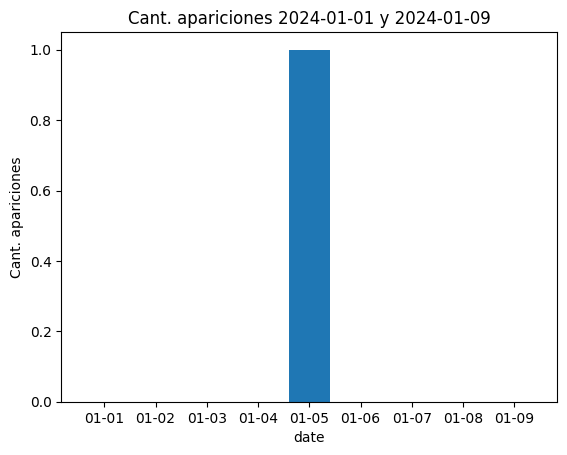

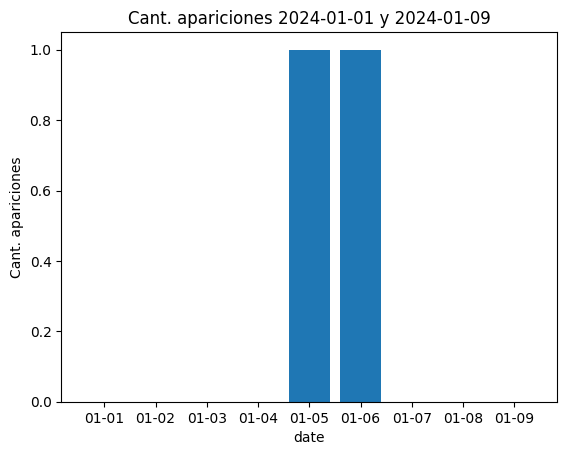

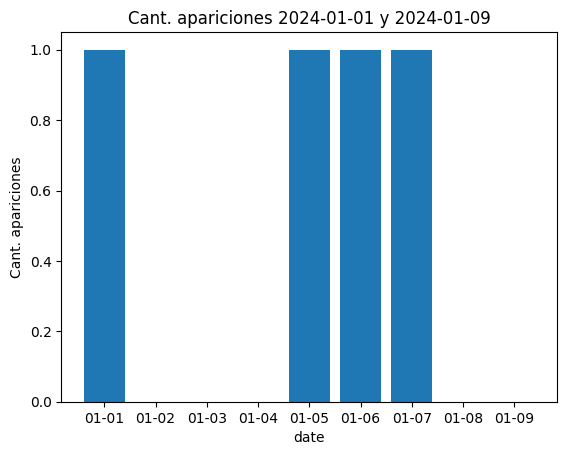

(1, 2, 4)


In [ ]:
#este codigo puede mejorar sumanto todas las columnas de un solo linea con iloc...
#la grafica podria ser en lineas y mostrar todos los patrones en una sola visualozacion...recorrer las columnas para mostrar por fecha

def sum_between_dates(df, start_date, end_date):
  # Convert dates to datetime objects for comparison
  df['date'] = pd.to_datetime(df['date'])
  df['mes_dia'] =df['date'].dt.strftime('%m') + '-' + df['date'].dt.strftime('%d')
  # Filter the DataFrame based on the date range
  filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
  # Calculate the sum of the 'cuad' column in the filtered DataFrame
  sum_cuad = filtered_df['cuad'].sum()
  sum_trip = filtered_df['c_trip'].sum()
  sum_doble = filtered_df['c_dobl'].sum()

  # Crear el gráfico
  plt.bar(filtered_df['mes_dia'], filtered_df['cuad'])
  plt.xlabel('date')
  plt.ylabel('Cant. apariciones')
  plt.title('Cant. apariciones {} y {}'.format(start_date, end_date))
  plt.show()

# Crear el gráfico
  plt.bar(filtered_df['mes_dia'], filtered_df['c_trip'])
  plt.xlabel('date')
  plt.ylabel('Cant. apariciones')
  plt.title('Cant. apariciones {} y {}'.format(start_date, end_date))
  plt.show()

  # Crear el gráfico
  plt.bar(filtered_df['mes_dia'], filtered_df['c_dobl'])
  plt.xlabel('date')
  plt.ylabel('Cant. apariciones')
  plt.title('Cant. apariciones {} y {}'.format(start_date, end_date))
  plt.show()
  return sum_cuad, sum_trip ,sum_doble


start_date = '2024-01-01'
end_date = '2024-01-09'
result = sum_between_dates(lot, start_date, end_date)
print(result)



In [ ]:
'''Funciona bn
     def compare_lists(list1, list2):
      for num in num_lot_d:
        if num not in sec_d:
         filtrado.append(num)
      return filtrado'''

def filter_list(list1, list2):
    # Crear una nueva lista que contenga solo los elementos de num_lot_d que no están en sec_d
    filtered_list = [num for num in list1 if num not in list2]
    return filtered_list

# Filtrar la lista
d_sin_sec = filter_list(num_lot_d, sec_d)
t_sin_sec = filter_list(num_lot_t, sec_t)
c_sin_sec = filter_list(num_lot_c, sec_c)

print(d_sin_sec)
print(len(d_sin_sec))
print(len(sec_d))
porcentaje_sec_d = (len(sec_d) / len(num_lot_d))
print(f"{porcentaje_sec_d:.2f}%")
print(t_sin_sec)
print(len(t_sin_sec))
print(len(sec_t))
porcentaje_sec_t = (len(sec_t) / len(num_lot_t))
print(f"{porcentaje_sec_t:.2f}%")
print(c_sin_sec)
print(len(num_lot_c))
print(len(c_sin_sec))
print(len(sec_c))
porcentaje_sec_c = (len(sec_c) / len(num_lot_c))
print(f"{porcentaje_sec_c:.3f}%")

['00', '02', '03', '04', '05', '06', '07', '08', '11', '13', '14', '15', '16', '17', '18', '19', '20', '22', '24', '25', '26', '27', '28', '29', '30', '31', '33', '35', '36', '37', '38', '39', '40', '41', '42', '44', '46', '47', '48', '49', '50', '51', '52', '53', '55', '57', '58', '59', '60', '61', '62', '63', '64', '66', '68', '69', '70', '71', '72', '73', '74', '75', '77', '79', '80', '81', '82', '83', '84', '85', '86', '88', '91', '92', '93', '94', '95', '96', '97', '99']
80
20
0.20%
['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '013', '014', '015', '016', '017', '018', '020', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '0

In [ ]:
'''def comparshit(c_sin_sec,sec_c):
  validacion =[]
  for num in c_sin_sec:
    if num in sec_c:
      validacion.append(num)
  return validacion

  # Llamar a la función y almacenar el resultado
resultado = comparshit(num_lot_c, sec_c)

# Imprimir el resultado
print("Lista de validación:")
resultado.sort()
print(resultado)
print(len(resultado))

def comparshit2(c_sin_sec,sec_c):
  validacion =[]
  for num in c_sin_sec:
    if num in sec_c:
      validacion.append(num)
  return validacion

  # Llamar a la función y almacenar el resultado
resultado2 = comparshit2(sec_c, resultado)

# Imprimir el resultado
print("Lista de validación:")
resultado2.sort()
print(resultado2)
print(len(resultado2))

def otracosa(list):
 for num in num_lot_c:
   num_lot_c == '9810' and '9867' and '9870' and '9876'
 return 1


res = otracosa(num_lot_c)
print(res)
#'9810', '9867', '9870', '9876']'''


'def comparshit(c_sin_sec,sec_c):\n  validacion =[]\n  for num in c_sin_sec:\n    if num in sec_c:\n      validacion.append(num)\n  return validacion\n\n  # Llamar a la función y almacenar el resultado\nresultado = comparshit(num_lot_c, sec_c)\n\n# Imprimir el resultado\nprint("Lista de validación:")\nresultado.sort()\nprint(resultado)\nprint(len(resultado))\n\ndef comparshit2(c_sin_sec,sec_c):\n  validacion =[]\n  for num in c_sin_sec:\n    if num in sec_c:\n      validacion.append(num)\n  return validacion\n\n  # Llamar a la función y almacenar el resultado\nresultado2 = comparshit2(sec_c, resultado)\n\n# Imprimir el resultado\nprint("Lista de validación:")\nresultado2.sort()\nprint(resultado2)\nprint(len(resultado2))\n\ndef otracosa(list):\n for num in num_lot_c:\n   num_lot_c == \'9810\' and \'9867\' and \'9870\' and \'9876\'\n return 1\n\n\nres = otracosa(num_lot_c)\nprint(res)\n#\'9810\', \'9867\', \'9870\', \'9876\']'

In [ ]:
lot['cod']=lot.index+1
inplace = True
display(lot)

,date,c_cifras,t_cifras,d_cifras,u_cifra,cuad,c_trip,t_trip,c_dobl,t_dobl,d_dobl,sec_d,sec_t,sec_c,mes_dia,cod
0,2024-01-01,2524,524,24,4,0,0,0,1,0,0,0,0,0,01-01,1
1,2024-01-02,0324,324,24,4,0,0,0,0,0,0,0,1,0,01-02,2
2,2024-01-03,9743,743,43,3,0,0,0,0,0,0,1,0,0,01-03,3
3,2024-01-04,1254,254,54,4,0,0,0,0,0,0,1,0,0,01-04,4
4,2024-01-05,1111,111,11,1,1,1,1,1,1,1,0,0,0,01-05,5
5,2024-01-06,1222,222,22,2,0,1,1,1,1,1,0,0,0,01-06,6
6,2024-01-07,2233,233,33,3,0,0,0,1,1,1,0,0,0,01-07,7
7,2024-01-08,0526,526,26,6,0,0,0,0,0,0,0,0,0,01-08,8
8,2024-01-09,0851,851,51,1,0,0,0,0,0,0,0,0,0,01-09,9
9,2024-01-10,0152,152,52,2,0,0,0,0,0,0,0,0,0,01-10,10


Probabilidades

In [ ]:
#Numeros directos / orden
#num_lot_c -> 10000 cifras -> 100%
#num_lot_t -> 1000 cifras ->  100%
#num_lot_d -> 100 cifras ->   100%
#num_lot_u -> 10 cifras ->    100%

#secuencia
#d_sin_sec -> 80 cifras ->    100%
#t_sin_sec -> 940 cifras ->  100%
#c_sin_sec -> 9760 cifras ->  100%
#sec_d -> 20 cifras ->        20%
#sec_t -> 60 cifras ->        6%
#sec_c -> 240 cifras ->       2,4%

#repeticiones
#d_sin_doble -> 90 cifras ->  100%
#t_sin_doble -> 990 cifras -> 100%
#c_sin_doble -> 9990 cifras ->100%
#doble -> 10 cifras ->        10%
#triple -> 10 cifras ->       0,1%
#cuadruple -> 10 cifras ->    0,01%

#Numeros directos / orden - sec -rep
#%_c -> (10000-240-10)=9750 cifras ->100%
#%_t -> (1000-60-10)=930 cifras ->   100%
#%_d -> (100-20-10)= 70 cifras ->    100%
#%_u -> 10 cifras ->                 100%


#Numeros indirectos / desorden
#c_desorden -> 210 cifras ->         100%
#t_desorden -> 120 cifras ->         100%

#secuencia
#t_desorden_sin_sec -> 200 cifras -> 100%
#c_desorden_sin_sec -> 110 cifras -> 100%
#sec_t -> 10 cifras ->               5%
#sec_c -> 10 cifras ->               8%

#Numeros indirectos / desorden - sec
#%_c -> (210-10)=200 cifras ->       100%
#%_t -> (120-10)=110 cifras ->       100%

In [ ]:
#1 ticket permite escoger max 12 cifras
#la cant.ap se puede distribuir a voluntad

#¿cuantos numeros escogidos por ticket reducen el porcentaje de perdida?

#¿cuando se quita un numero en especifico? que porcentaje se reduce en los diferentes num_lot? CHECK

#capturar cuantas veces se repite un numero en los diferentes num_lot y capturar las veces /  CHECK
#que se repite por lo menos una vez en cada num_lot? ej.
#fila 1 : 1123 | repite_num(1)=2 | rep_num_una_vez(1)=1 | repite_num(2)=1 | rep_num_una_vez(2)=1 | repite_num(3)=1 | rep_num_una_vez(3)=1 | repite_num(4)=0 | rep_num_una_vez(4)=0
#fila 2 : 1244 | repite_num(1)=1 | rep_num_una_vez(1)=1 | repite_num(2)=1 | rep_num_una_vez(2)=1 | repite_num(3)=0 | rep_num_una_vez(3)=0 | repite_num(4)=2 | rep_num_una_vez(4)=1
#TOTAL :                 3                  2                    2                   2                    1                   1                   2                   1



In [ ]:
# Función para verificar si algún dígito se repite exactamente una vez
def rep_num_u(cifra):
    return 1 if any(num == '1' for num in str(cifra)) else 0
def rep_num_d(cifra):
    return 1 if any(num == '2' for num in str(cifra)) else 0
def rep_num_t(cifra):
    return 1 if any(num == '3' for num in str(cifra)) else 0
def rep_num_c(cifra):
    return 1 if any(num == '4' for num in str(cifra)) else 0
def rep_num_ci(cifra):
    return 1 if any(num == '5' for num in str(cifra)) else 0
def rep_num_s(cifra):
    return 1 if any(num == '6' for num in str(cifra)) else 0
def rep_num_si(cifra):
    return 1 if any(num == '7' for num in str(cifra)) else 0
def rep_num_o(cifra):
    return 1 if any(num == '8' for num in str(cifra)) else 0
def rep_num_n(cifra):
    return 1 if any(num == '9' for num in str(cifra)) else 0
def rep_num_ce(cifra):
    return 1 if any(num == '0' for num in str(cifra)) else 0

# Aplicar la función a cada fila y crear una nueva columna
lot['c_rep_num_1'] = lot['c_cifras'].apply(rep_num_u)
lot['t_rep_num_1'] = lot['t_cifras'].apply(rep_num_u)
lot['d_rep_num_1'] = lot['d_cifras'].apply(rep_num_u)
lot['u_rep_num_1'] = lot['u_cifra'].apply(rep_num_u)

lot['c_rep_num_2'] = lot['c_cifras'].apply(rep_num_d)
lot['t_rep_num_2'] = lot['t_cifras'].apply(rep_num_d)
lot['d_rep_num_2'] = lot['d_cifras'].apply(rep_num_d)
lot['u_rep_num_2'] = lot['u_cifra'].apply(rep_num_d)

lot['c_rep_num_3'] = lot['c_cifras'].apply(rep_num_t)
lot['t_rep_num_3'] = lot['t_cifras'].apply(rep_num_t)
lot['d_rep_num_3'] = lot['d_cifras'].apply(rep_num_t)
lot['u_rep_num_3'] = lot['u_cifra'].apply(rep_num_t)

lot['c_rep_num_4'] = lot['c_cifras'].apply(rep_num_c)
lot['t_rep_num_4'] = lot['t_cifras'].apply(rep_num_c)
lot['d_rep_num_4'] = lot['d_cifras'].apply(rep_num_c)
lot['u_rep_num_4'] = lot['u_cifra'].apply(rep_num_c)

lot['c_rep_num_5'] = lot['c_cifras'].apply(rep_num_ci)
lot['t_rep_num_5'] = lot['t_cifras'].apply(rep_num_ci)
lot['d_rep_num_5'] = lot['d_cifras'].apply(rep_num_ci)
lot['u_rep_num_5'] = lot['u_cifra'].apply(rep_num_ci)

print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip  \
0 2024-01-01     2524       524        24        4     0       0       0   
1 2024-01-02     0324       324        24        4     0       0       0   
2 2024-01-03     9743       743        43        3     0       0       0   
3 2024-01-04     1254       254        54        4     0       0       0   
4 2024-01-05     1111       111        11        1     1       1       1   
5 2024-01-06     1222       222        22        2     0       1       1   
6 2024-01-07     2233       233        33        3     0       0       0   
7 2024-01-08     0526       526        26        6     0       0       0   
8 2024-01-09     0851       851        51        1     0       0       0   
9 2024-01-10     0152       152        52        2     0       0       0   

   c_dobl  t_dobl  ...  d_rep_num_3  u_rep_num_3  c_rep_num_4  t_rep_num_4  \
0       1       0  ...            0            0            1            1   
1      

In [ ]:
# Función para contar cuántas veces aparece el dígito 2
def rep_2_total(number, digit='2'):
    num_str = str(number)  # Convertir el número a una cadena
    digit_counts = Counter(num_str)  # Contar las ocurrencias de cada dígito
    return digit_counts.get(digit, 0)  # Obtener el conteo del dígito específico, o 0 si no está presente

  # Aplicar la función a cada fila y crear una nueva columna
lot['c_rep_2_total'] = lot['c_cifras'].apply(rep_2_total)
lot['t_rep_2_total'] = lot['t_cifras'].apply(rep_2_total)
lot['d_rep_2_total'] = lot['d_cifras'].apply(rep_2_total)
lot['u_rep_2_total'] = lot['u_cifra'].apply(rep_2_total)

print(lot)

        date c_cifras  t_cifras  d_cifras  u_cifra  cuad  c_trip  t_trip  \
0 2024-01-01     2524       524        24        4     0       0       0   
1 2024-01-02     0324       324        24        4     0       0       0   
2 2024-01-03     9743       743        43        3     0       0       0   
3 2024-01-04     1254       254        54        4     0       0       0   
4 2024-01-05     1111       111        11        1     1       1       1   
5 2024-01-06     1222       222        22        2     0       1       1   
6 2024-01-07     2233       233        33        3     0       0       0   
7 2024-01-08     0526       526        26        6     0       0       0   
8 2024-01-09     0851       851        51        1     0       0       0   
9 2024-01-10     0152       152        52        2     0       0       0   

   c_dobl  t_dobl  ...  d_rep_num_4  u_rep_num_4  c_rep_num_5  t_rep_num_5  \
0       1       0  ...            1            1            1            1   
1      

In [ ]:
def u_quitar(cifra):
    # Convertir la cifra a cadena para iterar sobre sus caracteres
    cifra_str = str(cifra)
    # Verificar si '1' está en la cadena
    if '0' in cifra_str:
        return cifra_str
    else:
        return None

# Aplicar la función a cada elemento de la lista con los numeros directos / ordenados
resultados_u = list(map(u_quitar, num_lot_u))
resultados_d = list(map(u_quitar, num_lot_d))
resultados_t = list(map(u_quitar, num_lot_t))
resultados_c = list(map(u_quitar, num_lot_c))

# Filtrar los valores None
resultados_filtrados_u = [resultado for resultado in resultados_u if resultado is not None]
resultados_filtrados_d = [resultado for resultado in resultados_d if resultado is not None]
resultados_filtrados_t = [resultado for resultado in resultados_t if resultado is not None]
resultados_filtrados_c = [resultado for resultado in resultados_c if resultado is not None]

print(resultados_filtrados_u)
print(len(resultados_filtrados_u))
print(f"{len(resultados_filtrados_u) / len(num_lot_u) :.2f}%")
print(resultados_filtrados_d)
print(len(resultados_filtrados_d))
print(f"{len(resultados_filtrados_d) / len(num_lot_d) :.2f}%")
print(resultados_filtrados_t)
print(len(resultados_filtrados_t))
print(f"{len(resultados_filtrados_t) / len(num_lot_t) :.2f}%")
print(resultados_filtrados_c)
print(len(resultados_filtrados_c))
print(f"{len(resultados_filtrados_c) / len(num_lot_c) :.2f}%")

#siempre sale la misma cantidad de cifras de un numero a quitar.

['0']
1
0.10%
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '20', '30', '40', '50', '60', '70', '80', '90']
19
0.19%
['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '201', '202', '203', 

In [ ]:
# Aplicar la función a cada elemento de la lista con los numeros indirectos / desordenados
resultados_t = list(map(u_quitar, t_desorden))
resultados_c = list(map(u_quitar, c_desorden))

# Filtrar los valores None
resultados_filtrados_t = [resultado for resultado in resultados_t if resultado is not None]
resultados_filtrados_c = [resultado for resultado in resultados_c if resultado is not None]


print(resultados_filtrados_t)
print(len(resultados_filtrados_t))
print(f"{len(resultados_filtrados_t) / len(t_desorden) :.2f}%")
print(resultados_filtrados_c)
print(len(resultados_filtrados_c))
print(f"{len(resultados_filtrados_c) / len(c_desorden) :.2f}%")

['012', '013', '014', '015', '016', '017', '018', '019', '023', '024', '025', '026', '027', '028', '029', '034', '035', '036', '037', '038', '039', '045', '046', '047', '048', '049', '056', '057', '058', '059', '067', '068', '069', '078', '079', '089']
36
0.30%
['0123', '0124', '0125', '0126', '0127', '0128', '0129', '0134', '0135', '0136', '0137', '0138', '0139', '0145', '0146', '0147', '0148', '0149', '0156', '0157', '0158', '0159', '0167', '0168', '0169', '0178', '0179', '0189', '0234', '0235', '0236', '0237', '0238', '0239', '0245', '0246', '0247', '0248', '0249', '0256', '0257', '0258', '0259', '0267', '0268', '0269', '0278', '0279', '0289', '0345', '0346', '0347', '0348', '0349', '0356', '0357', '0358', '0359', '0367', '0368', '0369', '0378', '0379', '0389', '0456', '0457', '0458', '0459', '0467', '0468', '0469', '0478', '0479', '0489', '0567', '0568', '0569', '0578', '0579', '0589', '0678', '0679', '0689', '0789']
84
0.40%


In [ ]:
print(len(num_lot_u))
print(len(num_lot_d))
print(len(num_lot_t))
print(len(num_lot_c))
num_ap = 12
print(f"{(1/len(num_lot_u)) :.2f}","%")
print(f"{(num_ap/len(num_lot_d)) :.2f}","%")
print(f"{(num_ap/len(num_lot_t)) :.3f}","%")
print(f"{(num_ap/len(num_lot_c)) :.4f}","%")

10
100
1000
10000
0.10 %
0.12 %
0.012 %
0.0012 %


In [ ]:
#creacion ticket y su probabilidad de ganancia
#punto de equilibrio entre ganancia y num_ap de
#cant_ap , ticket , num_ap
#por cada 12 numeros se crea un ticket
#la cant_ap se distribuye equitativamente entre los num_ap¿dependiendo del num_lot u_d_t_c?numero = int(input("Introduce un num_ap:"))

numero = int(input("inserte cant_num: "))
if 0 <= numero <= 12:
    print("ticket 1")
    num_ap_x_ticket = 1
elif 13 <= numero <= 24:
    print("ticket 2")
    num_ap_x_ticket = 2
elif 25 <= numero <= 36:
    print("ticket 3")
    num_ap_x_ticket = 3
elif 37 <= numero <= 48:
    print("ticket 4")
    num_ap_x_ticket = 4
elif 49 <= numero <= 60:
    print("ticket 5")
    num_ap_x_ticket = 5

for cant_num in t_desorden:
  print(cant_num)


inserte cant_num: 4
ticket 1
012
013
014
015
016
017
018
019
023
024
025
026
027
028
029
034
035
036
037
038
039
045
046
047
048
049
056
057
058
059
067
068
069
078
079
089
123
124
125
126
127
128
129
134
135
136
137
138
139
145
146
147
148
149
156
157
158
159
167
168
169
178
179
189
234
235
236
237
238
239
245
246
247
248
249
256
257
258
259
267
268
269
278
279
289
345
346
347
348
349
356
357
358
359
367
368
369
378
379
389
456
457
458
459
467
468
469
478
479
489
567
568
569
578
579
589
678
679
689
789


In [ ]:
#orden to colums
order = ['cod','date','c_cifras','t_cifras','d_cifras','u_cifra','cuad','c_trip','c_dobl','t_trip','t_dobl','d_dobl','sec_c','sec_t','sec_d']
lot = lot[order]
display(lot)
lot.to_excel('lot_eda.xlsx', index=False)
inplace=True
#lot.to_excel('/content/drive/My Drive/lot.xlsx', index=False)

,cod,date,c_cifras,t_cifras,d_cifras,u_cifra,cuad,c_trip,c_dobl,t_trip,t_dobl,d_dobl,sec_c,sec_t,sec_d
0,1,2024-01-01,2524,524,24,4,0,0,1,0,0,0,0,0,0
1,2,2024-01-02,0324,324,24,4,0,0,0,0,0,0,0,1,0
2,3,2024-01-03,9743,743,43,3,0,0,0,0,0,0,0,0,1
3,4,2024-01-04,1254,254,54,4,0,0,0,0,0,0,0,0,1
4,5,2024-01-05,1111,111,11,1,1,1,1,1,1,1,0,0,0
5,6,2024-01-06,1222,222,22,2,0,1,1,1,1,1,0,0,0
6,7,2024-01-07,2233,233,33,3,0,0,1,0,1,1,0,0,0
7,8,2024-01-08,0526,526,26,6,0,0,0,0,0,0,0,0,0
8,9,2024-01-09,0851,851,51,1,0,0,0,0,0,0,0,0,0
9,10,2024-01-10,0152,152,52,2,0,0,0,0,0,0,0,0,0
